In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

In [2]:
df = pd.read_csv('../data/locations_copy.csv')

In [3]:
df

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
1,Madrid,Spain,Europe,40.40,-3.68,-1.5,41.6,17.0,8.0,28.0,20.0
2,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.8,8.0,28.0,20.0
3,Paris,France,Europe,48.87,2.33,-4.1,35.2,13.4,8.0,28.0,20.0
4,London,United Kingdom,Europe,51.52,-0.11,-2.9,31.6,12.0,8.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
77,Perth,Australia,Australia,-31.93,115.83,7.0,37.6,19.4,15.0,28.0,20.0
78,Melbourne,Australia,Australia,-37.82,144.97,1.4,39.6,15.1,15.0,28.0,20.0
79,Brisbane,Australia,Australia,-27.50,153.02,9.1,34.6,20.8,15.0,28.0,20.0
80,Broome,Australia,Australia,-17.97,122.23,13.3,34.9,27.0,15.0,28.0,20.0


In [3]:
X = df[['latitude', 'longitude']]
y = df.drop(['city', 'country', 'continent', 'latitude', 'longitude'], axis=1)

In [4]:
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
predictions = model.predict(np.array([[77, -46]]))

In [87]:
predictions

array([[-17.009861 ,  11.70438  ,  -7.7183185,  -5.0017943,  15.038769 ,
          5.000332 ]], dtype=float32)

C:\Users\tymek\AppData\Local\Temp\ipykernel_17676\2231483453.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



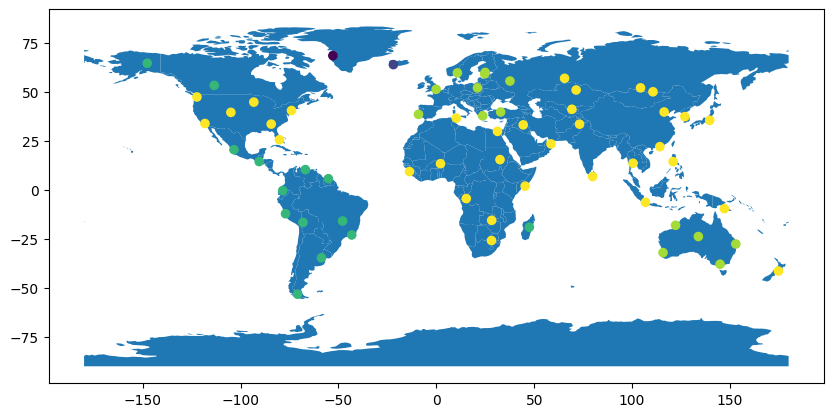

In [105]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv('../data/locations_copy.csv')
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', c=gdf['maxtemp'], markersize=35);

In [5]:
from data.data import plot_map

C:\Users\tymek\PycharmProjects\alwaysgoodweather\data\data.py:116: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


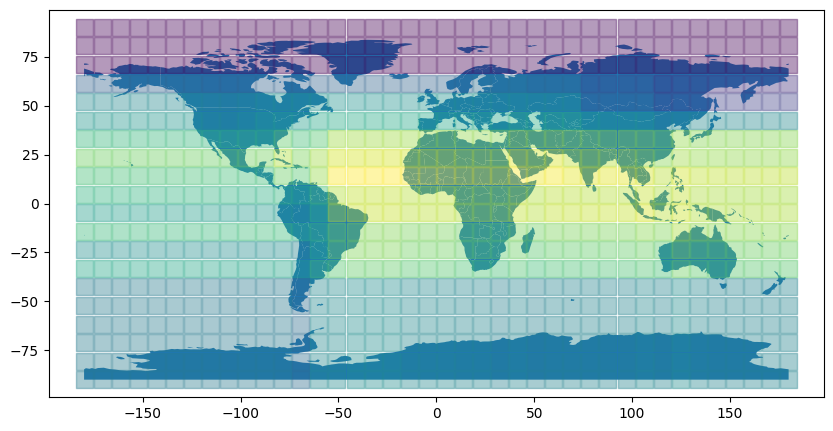

In [18]:
plot_map(400, 2, model, 150)